In [1]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Anasuya-Sahoo/DMDW-Lab/main/student-mat.csv',sep=',')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# BINARY ATTRIBUTE

In [4]:
dfs=df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]
dfs.head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,yes,no,no,no,yes,yes,no,no
1,no,yes,no,no,no,yes,yes,no
2,yes,no,yes,no,yes,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,yes,no,no


In [5]:
dfs=dfs.replace('no',0)
dfs=dfs.replace('yes',1)

dfs.head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0


In [6]:
n=np.array(dfs[['schoolsup','famsup']])
n=n.reshape(-1,2)
n.shape

(395, 2)

In [7]:
from scipy.spatial import distance
dist_matrix=distance.cdist(n,n)
print(dist_matrix)

[[0.         1.41421356 0.         ... 1.         1.         1.        ]
 [1.41421356 0.         1.41421356 ... 1.         1.         1.        ]
 [0.         1.41421356 0.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.         0.         0.        ]]


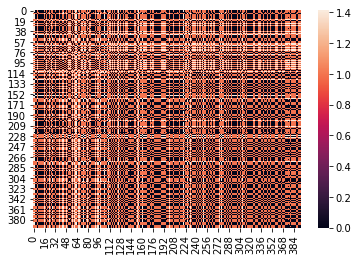

In [8]:
sbs.heatmap(dist_matrix)
plt.show()

# NOMINAL ATTRIBUTE

In [9]:
nominal=df[['Mjob','Fjob','reason','guardian']]
nominal=nominal.replace('at_home','home')
nominal=(nominal.astype('category'))

In [10]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
nominal['guardian']=lb.fit_transform(nominal['guardian'])
nominal['Mjob']=lb.fit_transform(nominal['Mjob'])
nominal['Fjob']=lb.fit_transform(nominal['Fjob'])
nominal['reason']=lb.fit_transform(nominal['reason'])

ModuleNotFoundError: No module named 'sklearn'

In [11]:
nominal.head()

,Mjob,Fjob,reason,guardian
0,home,teacher,course,mother
1,home,other,course,father
2,home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [12]:
nom1=np.array(nominal)
nom1.reshape(-1,2)
nom2=np.array(nominal)
nom2.reshape(-1,2)

array([['home', 'teacher'],
       ['course', 'mother'],
       ['home', 'other'],
       ...,
       ['course', 'mother'],
       ['other', 'home'],
       ['course', 'father']], dtype=object)